In [ ]:
#pip install imbalanced-learn
#pip install delayed

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.drop(['TotalCharges'],axis=1,inplace=True)

## Scenario One - No Combination

In [6]:
x1 = df.drop(['customerID','Churn'],axis=1)

In [7]:
y = df['Churn']

In [8]:
x1 = pd.get_dummies(x1,drop_first=True)

In [9]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   gender_Male                            7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   PhoneService_Yes                       7043 non-null   uint8  
 7   MultipleLines_No phone service         7043 non-null   uint8  
 8   MultipleLines_Yes                      7043 non-null   uint8  
 9   InternetService_Fiber optic            7043 non-null   uint8  
 10  InternetService_No                     7043 non-null   uint8  
 11  Onli

In [10]:
df = pd.concat([x1, y], axis=1)
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})
df

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,0,1,0,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,0,1,1,1,0,1,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,1,1,0,1,0,1,1,...,0,0,0,0,0,1,0,0,1,1


In [11]:
#### Checking outliers by looking at pairwise plots, especially focusing on other features' relationships with two numerical features we have here: 'MonthlyCharges' and 'Tenure'

In [ ]:
# Exploring 'MonthlyCharges' 1
sns.set()
cols = ['MonthlyCharges','PhoneService_Yes','MultipleLines_No phone service',
        'OnlineSecurity_Yes','OnlineBackup_Yes',
        'DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','StreamingMovies_Yes']
sns.pairplot(x1[cols])
plt.show()

In [ ]:
#The points at the top left corners could be considered outliers...?
sns.set()
#cols = ['MonthlyCharges','MultipleLines_Yes']
#sns.pairplot(x1[cols])
plt.scatter(x1['MonthlyCharges'],x1['MultipleLines_Yes'])
plt.show()

In [ ]:
x1[x1['MultipleLines_Yes']==1].sort_values(by = 'MonthlyCharges').head(400)
#Too many data points, so not considered outliers.

In [ ]:
# Exploring 'MonthlyCharges' 2
sns.set()
cols = ['MonthlyCharges','tenure', 'Contract_Two year',
        'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']
sns.pairplot(x1[cols])
plt.show()

In [ ]:
# Exploring 'Tenure' 1
sns.set()
cols = ['tenure','SeniorCitizen','MonthlyCharges','gender_Male','Partner_Yes','Dependents_Yes']
sns.pairplot(x1[cols])
plt.show()

In [ ]:
# Exploring 'Tenure' 2
sns.set()
cols = ['tenure','PhoneService_Yes','MultipleLines_No phone service',
        'OnlineSecurity_Yes','OnlineBackup_Yes',
        'DeviceProtection_Yes','TechSupport_Yes','StreamingTV_Yes','StreamingMovies_Yes']
sns.pairplot(x1[cols])
plt.show()

In [12]:
SEED = 4
(x_train, x_test, y_train, y_test) = train_test_split(x1, y,test_size=0.3, stratify=y, random_state=SEED)

### 1.1 Random Forest with Original Data

In [13]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7,random_state=SEED)

In [ ]:
param_grid = {
                 'n_estimators': [200,400,600,800,1000],
                 'max_depth': [6.5, 7, 7.5, 10],
                'min_samples_leaf': [0.03, 0.06, 0.13, 0.3, 0.5,1]
             }
grid_clf = GridSearchCV(rf, param_grid, cv=10)
grid_clf.fit(x_train, y_train)

In [ ]:
grid_clf.best_estimator_

In [14]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy score: {:.10f}'.format(accuracy_rf))
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Accuracy score: 0.8035967818
Classification Report
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1552
         Yes       0.69      0.47      0.56       561

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [15]:
scores = cross_val_score(rf, x_train, y_train, scoring='accuracy', cv=10) 
print(np.mean(scores))

0.7943204868154159


### 1.2 Oversampling Minority Class (using the simplest method: resampling existing Churn data)

In [16]:
# concatenate our training data back together
X = pd.concat([x_train, y_train], axis=1)
X

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
3830,0,4,100.20,1,1,0,1,0,1,1,...,1,0,1,0,0,1,0,1,0,Yes
5342,0,37,64.75,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,Yes
1189,0,3,85.70,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,No
2543,0,13,98.15,1,0,0,1,0,1,1,...,1,0,1,0,0,0,0,0,1,Yes
6603,0,14,66.60,1,1,0,1,0,1,0,...,1,0,0,0,0,1,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0,29,74.95,0,1,0,1,0,1,1,...,0,0,0,0,0,1,0,1,0,No
5785,0,46,20.20,1,1,1,1,0,0,0,...,0,1,0,0,1,1,0,0,1,No
2377,0,47,55.30,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,No
58,0,34,24.95,0,1,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,No


In [19]:
print(len(X[X['Churn']=='No']))
print(len(X[X['Churn']=='Yes']))

3622
1308


In [20]:
# separate minority and majority classes
not_churn = X[X['Churn']=='No']
churn = X[X['Churn']=='Yes']

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=SEED) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled['Churn'].value_counts()

Yes    3622
No     3622
Name: Churn, dtype: int64

### 1.3 Random Forest with Resampled Data

In [22]:
y_train_rs = upsampled['Churn']
x_train_rs = upsampled.drop('Churn', axis=1)

upsampled = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=SEED).fit(x_train_rs, y_train_rs)
upsampled_pred = upsampled.predict(x_test)

accuracy_up = accuracy_score(y_test, upsampled_pred)
print('Accuracy score: {:.10f}'.format(accuracy_up))
print("Classification Report")
print(classification_report(y_test, upsampled_pred))

Accuracy score: 0.7449124468
Classification Report
              precision    recall  f1-score   support

          No       0.91      0.73      0.81      1552
         Yes       0.51      0.79      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113



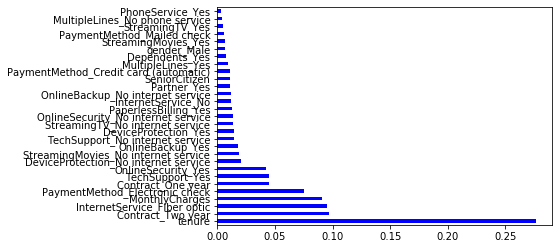

tenure                                  0.276829
Contract_Two year                       0.097013
InternetService_Fiber optic             0.095083
MonthlyCharges                          0.091118
PaymentMethod_Electronic check          0.075033
Contract_One year                       0.044999
TechSupport_Yes                         0.044828
OnlineSecurity_Yes                      0.042025
DeviceProtection_No internet service    0.020268
StreamingMovies_No internet service     0.018980
OnlineBackup_Yes                        0.018140
TechSupport_No internet service         0.014892
DeviceProtection_Yes                    0.014881
StreamingTV_No internet service         0.014036
OnlineSecurity_No internet service      0.013317
PaperlessBilling_Yes                    0.012913
InternetService_No                      0.012271
OnlineBackup_No internet service        0.011847
Partner_Yes                             0.010999
SeniorCitizen                           0.010921
dtype: float64

In [23]:
# Check feature importance after Random Forest
importances_rf = pd.Series(rf.feature_importances_,index = x1.columns)
sorted_importances_rf = importances_rf.sort_values(ascending=False)
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()
sorted_importances_rf[0:20]

In [24]:
importances_rf = pd.Series(upsampled.feature_importances_,index = x1.columns)
sorted_importances_rf = importances_rf.sort_values(ascending=False)
# Make a horizontal bar plot
#sorted_importances_rf.plot(kind='barh', color='blue')
#plt.show()
sorted_importances_rf[0:20]

tenure                                   0.236708
Contract_Two year                        0.161260
InternetService_Fiber optic              0.096257
MonthlyCharges                           0.074046
PaymentMethod_Electronic check           0.070202
Contract_One year                        0.055035
TechSupport_Yes                          0.037844
OnlineSecurity_Yes                       0.030196
StreamingMovies_No internet service      0.025712
DeviceProtection_No internet service     0.021722
TechSupport_No internet service          0.017724
InternetService_No                       0.015909
StreamingTV_No internet service          0.015808
OnlineSecurity_No internet service       0.015101
OnlineBackup_Yes                         0.014864
OnlineBackup_No internet service         0.014791
PaperlessBilling_Yes                     0.012506
PaymentMethod_Credit card (automatic)    0.011597
Partner_Yes                              0.010842
SeniorCitizen                            0.009115


### 1.4 Decision Tree and Ada Boosting with Original Data

In [35]:
dt = DecisionTreeClassifier(max_depth=7, random_state=SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=SEED)

In [28]:
#DT
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy score: {:.10f}'.format(accuracy_dt))
print("Classification Report")
print(classification_report(y_test, y_pred_dt))

Accuracy score: 0.7884524373
Classification Report
              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1552
         Yes       0.62      0.54      0.57       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [36]:
#Ada
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('Accuracy score: {:.10f}'.format(accuracy_ada))
print("Classification Report")
print(classification_report(y_test, y_pred_ada))

Accuracy score: 0.7557974444
Classification Report
              precision    recall  f1-score   support

          No       0.82      0.85      0.84      1552
         Yes       0.54      0.50      0.52       561

    accuracy                           0.76      2113
   macro avg       0.68      0.67      0.68      2113
weighted avg       0.75      0.76      0.75      2113



### 1.5 Decision Tree and Ada Boosting with Resampled Data

In [33]:
dt = DecisionTreeClassifier(max_depth=7, random_state=SEED)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=SEED)

In [34]:
#DT
dt.fit(x_train_rs, y_train_rs)
y_pred_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy score: {:.10f}'.format(accuracy_dt))
print("Classification Report")
print(classification_report(y_test, y_pred_dt))

Accuracy score: 0.7023189778
Classification Report
              precision    recall  f1-score   support

          No       0.90      0.67      0.77      1552
         Yes       0.46      0.80      0.59       561

    accuracy                           0.70      2113
   macro avg       0.68      0.73      0.68      2113
weighted avg       0.78      0.70      0.72      2113



In [37]:
#Ada
ada.fit(x_train_rs, y_train_rs)
y_pred_ada = ada.predict(x_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('Accuracy score: {:.10f}'.format(accuracy_ada))
print("Classification Report")
print(classification_report(y_test, y_pred_ada))

Accuracy score: 0.7524846190
Classification Report
              precision    recall  f1-score   support

          No       0.81      0.87      0.84      1552
         Yes       0.54      0.43      0.48       561

    accuracy                           0.75      2113
   macro avg       0.68      0.65      0.66      2113
weighted avg       0.74      0.75      0.74      2113



### 1.6 Gradient Boosting with Original Data

In [30]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=4, max_depth=8, random_state=SEED)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy score: {:.10f}'.format(accuracy_gb))
print("Classification Report")
print(classification_report(y_test, y_pred_gb))

Accuracy score: 0.7676289636
Classification Report
              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1552
         Yes       0.57      0.49      0.53       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



### 1.7 Gradient Boosting with Resampled Data

In [39]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=4, max_depth=8, random_state=SEED)
gb.fit(x_train_rs, y_train_rs)
y_pred_gb = gb.predict(x_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy score: {:.10f}'.format(accuracy_gb))
print("Classification Report")
print(classification_report(y_test, y_pred_gb))

Accuracy score: 0.7482252721
Classification Report
              precision    recall  f1-score   support

          No       0.85      0.80      0.82      1552
         Yes       0.52      0.60      0.56       561

    accuracy                           0.75      2113
   macro avg       0.69      0.70      0.69      2113
weighted avg       0.76      0.75      0.75      2113



### 1.8 PCA Dimension Reduction with Original Data

In [53]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7,random_state=SEED)
scale = StandardScaler()

In [54]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [55]:
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
rf.fit(x_train_pca, y_train)
y_pred_rf_pca = rf.predict(x_test_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print('Accuracy score: {:.10f}'.format(accuracy_rf_pca))
print("Classification Report")
print(classification_report(y_test, y_pred_rf_pca))

Accuracy score: 0.7922385234
Classification Report
              precision    recall  f1-score   support

          No       0.82      0.91      0.87      1552
         Yes       0.65      0.46      0.54       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



### 1.9 PCA Dimension Reduction with Resampled Data

In [72]:
rf = RandomForestClassifier(n_estimators=200, max_depth=7,random_state=SEED)
scale = StandardScaler()

In [73]:
x_train_rs_scaled = scale.fit_transform(x_train_rs)
x_test_rs_scaled = scale.transform(x_test)

In [74]:
# fit and transform data
x_train_rs_pca = pca.fit_transform(x_train_rs_scaled)
x_test_rs_pca = pca.transform(x_test_rs_scaled)
rf.fit(x_train_rs_pca, y_train_rs)
y_pred_rf_pca = rf.predict(x_test_rs_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print('Accuracy score: {:.10f}'.format(accuracy_rf_pca))
print("Classification Report")
print(classification_report(y_test, y_pred_rf_pca))

Accuracy score: 0.7425461429
Classification Report
              precision    recall  f1-score   support

          No       0.89      0.74      0.81      1552
         Yes       0.51      0.75      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.74      0.76      2113



## Scenario One Summary:

### Random Forest:
- With nothing: 0.8035967818, f1 score: 0.87, 0.56
- With PCA only: 0.7922385234, f1 score: 0.87, 0.54
- With resampling only: 0.7449124468, f1 score: 0.81, 0.62
- With PCA, resampling: 0.7425461429, f1 score: 0.81, 0.61

### Gradient Boosting: 
- With nothing: 0.7676289636, f1 score: 0.85, 0.53
- With resampling only: 0.7482252721, f1 score: 0.82, 0.56

### Ada Boosting:
- With nothing: 0.7557974444, f1 score: 0.84, 0.52
- With resampling only: 0.7524846190, f1 score: 0.84, 0.48

### Decision Tree:
- With nothing: 0.7884524373, f1 score: 0.86, 0.57
- With resampling only: 0.7023189778, f1 score: 0.77, 0.59

## Scenario 2 - With Combination (No Services and No) - Selected Approach

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
x2 = df.drop(['customerID','Churn','TotalCharges'],axis=1)

In [5]:
y = df['Churn']

In [6]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
x2.shape

(7043, 18)

In [8]:
x2['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [9]:
x2.loc[x2['MultipleLines']=='No phone service','MultipleLines'] = 'No'

In [10]:
x2.loc[x2['OnlineSecurity']=='No internet service','OnlineSecurity'] = 'No'

In [11]:
x2.loc[x2['OnlineBackup']=='No internet service','OnlineBackup'] = 'No'

In [12]:
x2.loc[x2['DeviceProtection']=='No internet service','DeviceProtection'] = 'No'

In [13]:
x2.loc[x2['TechSupport']=='No internet service','TechSupport'] = 'No'

In [14]:
x2['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [15]:
x2.loc[x2['StreamingTV']=='No internet service','StreamingTV'] = 'No'

In [16]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [17]:
x2.loc[x2['StreamingMovies']=='No internet service','StreamingMovies'] = 'No'

In [18]:
x2.shape

(7043, 18)

In [19]:
x2 = pd.get_dummies(x2,drop_first=True)

In [20]:
x2.shape

(7043, 22)

In [21]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   gender_Male                            7043 non-null   uint8  
 4   Partner_Yes                            7043 non-null   uint8  
 5   Dependents_Yes                         7043 non-null   uint8  
 6   PhoneService_Yes                       7043 non-null   uint8  
 7   MultipleLines_Yes                      7043 non-null   uint8  
 8   InternetService_Fiber optic            7043 non-null   uint8  
 9   InternetService_No                     7043 non-null   uint8  
 10  OnlineSecurity_Yes                     7043 non-null   uint8  
 11  Onli

In [22]:
SEED = 4
(x_train, x_test, y_train, y_test) = train_test_split(x2, y, test_size=0.3, stratify=y, random_state=SEED)

### 2.1 Random Forest with Original Data

In [23]:
rf = RandomForestClassifier(n_estimators=200,
max_depth=7,
random_state=SEED)

In [24]:
param_grid = {
                 'n_estimators': [200,400,600,800,1000],
                 'max_depth': [2, 5, 7, 9,12],
                'min_samples_leaf': [0.06, 0.13, 0.2, 0.3,1]
             }
grid_clf = GridSearchCV(rf, param_grid, cv=10)
grid_clf.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_clf.best_estimator_

In [25]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy score: {:.10f}'.format(accuracy_rf))
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

Accuracy score: 0.8050165641
Classification Report
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1552
         Yes       0.69      0.48      0.57       561

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.81      0.79      2113



### 2.2 Resampling Method One:  Over Sampling the Minority Data

In [26]:
X = pd.concat([x_train, y_train], axis=1)
X

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
3830,0,4,100.20,1,1,0,1,1,1,0,...,0,1,1,0,0,1,0,1,0,Yes
5342,0,37,64.75,0,0,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,Yes
1189,0,3,85.70,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,No
2543,0,13,98.15,1,0,0,1,1,1,0,...,0,1,1,0,0,0,0,0,1,Yes
6603,0,14,66.60,1,1,0,1,1,0,0,...,1,1,0,0,0,1,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,0,29,74.95,0,1,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0,No
5785,0,46,20.20,1,1,1,1,0,0,1,...,0,0,0,0,1,1,0,0,1,No
2377,0,47,55.30,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,No
58,0,34,24.95,0,1,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,No


In [27]:
X['Churn'].value_counts()

No     3622
Yes    1308
Name: Churn, dtype: int64

In [28]:
# separate minority and majority classes
not_churn = X[X['Churn']=='No']
churn = X[X['Churn']=='Yes']

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=SEED) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled['Churn'].value_counts()

No     3622
Yes    3622
Name: Churn, dtype: int64

In [29]:
y_train_rs = upsampled['Churn']
x_train_rs = upsampled.drop('Churn', axis=1)

#Random Forest
upsampled = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=SEED).fit(x_train_rs, y_train_rs)
#gradient boosting
#upsampled = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=4, max_depth=8, 
#                                       random_state=SEED).fit(x_train, y_train)
upsampled_pred = upsampled.predict(x_test)

accuracy_up = accuracy_score(y_test, upsampled_pred)
print('Accuracy score: {:.10f}'.format(accuracy_up))
print("Classification Report")
print(classification_report(y_test, upsampled_pred))

Accuracy score: 0.7505915760
Classification Report
              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1552
         Yes       0.52      0.78      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



### 2.3 Resampling Method Two: SMOTE (regular SMOTE, bordeline SMOTE, SVM SMOTE, ADASYN)

In [33]:
#Choose any model to run

model = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=SEED)
#model = LogisticRegression(max_iter = 200,random_state=SEED)
#model = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators=10, random_state=SEED)

In [34]:
# Trying different methods
steps = [('over', SMOTE()), ('model', model)]
#steps = [('over', SVMSMOTE()), ('model', model)]
#steps = [('over', BorderlineSMOTE()), ('model', model)]
#steps = [('over', ADASYN()), ('model', model)]
pipeline = Pipeline(steps=steps)

In [35]:
pipeline.fit(x_train, y_train)
y_pred_pipe = pipeline.predict(x_test)

accuracy_pipe = accuracy_score(y_test, y_pred_pipe)
print('Accuracy score: {:.10f}'.format(accuracy_pipe))
print("Classification Report")
print(classification_report(y_test, y_pred_pipe))

Accuracy score: 0.7595835305
Classification Report
              precision    recall  f1-score   support

          No       0.89      0.77      0.82      1552
         Yes       0.53      0.73      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113



#### Note: After doing some preliminary research, we found out that SMOTE would perform better when it is combined with undersampling of the majority class. Therefore, we will first oversample the minority class with SMOTE to about a 3:5 ratio (initially about 2:5 ratio), then undersample the majority class to achieve about a 4:5 ratio

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [43]:
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.8)
model = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=SEED)
steps = [('over', over), ('under', under), ('model', model)]
pipeline2 = Pipeline(steps=steps)

In [44]:
pipeline2.fit(x_train, y_train)
y_pred_pipe2 = pipeline2.predict(x_test)
accuracy_pipe2 = accuracy_score(y_test, y_pred_pipe2)
print('Test accuracy score: {:.10f}'.format(accuracy_pipe2))
print("Classification Report")
print(classification_report(y_test, y_pred_pipe2))

Test accuracy score: 0.7718883105
Classification Report
              precision    recall  f1-score   support

          No       0.88      0.80      0.84      1552
         Yes       0.56      0.70      0.62       561

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.79      0.77      0.78      2113



In [38]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
scores = cross_val_score(pipeline2, x_train, y_train, scoring='accuracy', cv=cv)
print('Mean accuracy score %.3f' % np.mean(scores))

Mean accuracy score 0.776


In [44]:
#Using BorderlineSMOTE for oversampling
model = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=SEED)
over = BorderlineSMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), ('under', under), ('model', model)]
pipeline2 = Pipeline(steps=steps)

In [46]:
y_pred_pipe2 = pipeline2.predict(x_test)
accuracy_pipe2 = accuracy_score(y_test, y_pred_pipe2)
print('Test accuracy score: {:.10f}'.format(accuracy_pipe2))
print("Classification Report")
print(classification_report(y_test, y_pred_pipe2))

Test accuracy score: 0.7633696167
Classification Report
              precision    recall  f1-score   support

          No       0.89      0.77      0.83      1552
         Yes       0.54      0.74      0.62       561

    accuracy                           0.76      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.76      0.77      2113



In [47]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=SEED)
scores = cross_val_score(pipeline2, x_train, y_train, scoring='accuracy', cv=cv)
print('Mean accuracy score %.3f' % np.mean(scores))

Mean accuracy score 0.766


### 2.4 PCA Dimension Reduction

#### 2.4.1 With Standardized Original Data

In [74]:
# 2.4.1 With original data:

scale = StandardScaler()
pca = PCA(n_components=5)

x_train_std = scale.fit_transform(x_train)
x_test_std = scale.transform(x_test)

# fit and transform data
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [75]:
rf = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=SEED)

rf.fit(x_train_pca, y_train)
y_pred_rf_pca = rf.predict(x_test_pca)

accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print('Accuracy score: {:.10f}'.format(accuracy_rf_pca))
print("Classification Report")
print(classification_report(y_test, y_pred_rf_pca))

Accuracy score: 0.7879791765
Classification Report
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1552
         Yes       0.64      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113



#### 2.4.2 With Standardized Oversampled Data

In [76]:
# With Oversampled Data

scale = StandardScaler()
pca = PCA(n_components=5)

x_train_rs_std = scale.fit_transform(x_train_rs)
x_test_std = scale.transform(x_test)

# fit and transform data
x_train_rs_pca = pca.fit_transform(x_train_rs_std)
x_test_pca = pca.transform(x_test_std)

In [77]:
rf = RandomForestClassifier(n_estimators=200,max_depth=7,random_state=SEED)

rf.fit(x_train_rs_pca, y_train_rs)
y_pred_rf_pca = rf.predict(x_test_pca)

#gradient boosting
#gb.fit(x_train_pca, y_train)
#y_pred_rf_pca = gb.predict(x_test_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print('Accuracy score: {:.10f}'.format(accuracy_rf_pca))
print("Classification Report")
print(classification_report(y_test, y_pred_rf_pca))

Accuracy score: 0.7501183152
Classification Report
              precision    recall  f1-score   support

          No       0.88      0.76      0.82      1552
         Yes       0.52      0.73      0.61       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



#### 2.4.3 Combine PCA Data and Standardized Orginal Data

In [80]:
concat_train_data = np.concatenate((x_train_std, x_train_pca), 1)
concat_test_data = np.concatenate((x_test_std, x_test_pca), 1)

rf.fit(concat_train_data, y_train)
y_pred_concat = rf.predict(concat_test_data)

accuracy_pcaconcat = accuracy_score(y_test, y_pred_concat)
print('Accuracy score: {:.10f}'.format(accuracy_pcaconcat))
print("Classification Report")
print(classification_report(y_test, y_pred_concat))

Accuracy score: 0.7813535258
Classification Report
              precision    recall  f1-score   support

          No       0.79      0.97      0.87      1552
         Yes       0.74      0.27      0.40       561

    accuracy                           0.78      2113
   macro avg       0.76      0.62      0.63      2113
weighted avg       0.77      0.78      0.74      2113



### 2.5 Gradient Boosting

In [82]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=4, max_depth=8, random_state=SEED)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy score: {:.10f}'.format(accuracy_gb))
print("Classification Report")
print(classification_report(y_test, y_pred_gb))

Accuracy score: 0.7714150497
Classification Report
              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1552
         Yes       0.58      0.49      0.53       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.77      2113



## Scenario Two Summary

### Random Forest:
- With nothing: 0.8050165641, f1 score: 0.87, 0.57 
- With PCA only: 0.7879791765, f1 score: 0.86, 0.53
- With resampling only: .7505915760, f1 score: 0.81, 0.62
- With PCA and resampling: 0.7501183152, f1 score: 0.82, 0.61
- With PCA and some standardized data combined: 0.7813535258, f1 score: 0.87, 0.40
- With Smote(over only, regular): 0.7595835305, f1 score: 0.82, 0.62
- With Smote(over only, SVM): 0.7524846190, f1 score: 0.82, 0.62
- With Smote(over only, Bordeline): 0.7501183152, f1 score: 0.82, 0.61
- With Smote(over and under): 0.7718883105, f1 score: 0.84, 0.62
- With Smote(over with Boardeline and under): 0.7633696167, f1 score: 0.83, 0.62
- With ADASYN: 0.7534311406, f1 score: 0.82, 0.62

### Gradient Boosting:
- With nothing: 0.7714150497, f1 score: 0.85, 0.53
- With PCA only:  0.7662091813, f1 score: 0.84, 0.53
- With resampling only: 0.7633696167, f1 score: 0.84, 0.58
- With PCA, resampling:  0.7401798391, f1 score: 0.82, 0.52

In [ ]:
#Reference to PCA+Original Data performing better than PCA only
#https://towardsdatascience.com/dimensionality-reduction-can-pca-improve-the-performance-of-a-classification-model-d4e34194c544

### Logistic Regression

In [88]:
lr = LogisticRegression(max_iter = 200).fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy score: {:.10f}'.format(accuracy_lr))
print("Classification Report")
print(classification_report(y_test, y_pred_lr))

Accuracy score: 0.8111689541
Classification Report
              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1552
         Yes       0.68      0.55      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



### Bagging using logistitic regression as base model

In [84]:
bg_lr = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators=10, random_state=SEED).fit(x_train, y_train)
y_pred_bglr = bg_lr.predict(x_test)
accuracy_bglr = accuracy_score(y_test, y_pred_bglr)
print('Accuracy score: {:.10f}'.format(accuracy_bglr))
print("Classification Report")
print(classification_report(y_test, y_pred_bglr))

Accuracy score: 0.8088026503
Classification Report
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1552
         Yes       0.68      0.54      0.60       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



### SVM

In [85]:
rbf_svm = svm.SVC(kernel='rbf', probability = True).fit(x_train, y_train)  # probability = True
y_pred_svm = rbf_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy score: {:.10f}'.format(accuracy_svm))
print("Classification Report")
print(classification_report(y_test, y_pred_svm))

Accuracy score: 0.7879791765
Classification Report
              precision    recall  f1-score   support

          No       0.81      0.93      0.87      1552
         Yes       0.68      0.38      0.49       561

    accuracy                           0.79      2113
   macro avg       0.74      0.66      0.68      2113
weighted avg       0.77      0.79      0.77      2113



### Bagging using SVM as base model

In [87]:
bg_svm = BaggingClassifier(base_estimator = SVC(), n_estimators=10, random_state=SEED).fit(x_train, y_train)
y_pred_bgsvm = bg_svm.predict(x_test)
accuracy_bgsvm = accuracy_score(y_test, y_pred_bgsvm)
print('Accuracy score: {:.10f}'.format(accuracy_bgsvm))
print("Classification Report")
print(classification_report(y_test, y_pred_bgsvm))

Accuracy score: 0.7893989588
Classification Report
              precision    recall  f1-score   support

          No       0.81      0.94      0.87      1552
         Yes       0.69      0.38      0.49       561

    accuracy                           0.79      2113
   macro avg       0.75      0.66      0.68      2113
weighted avg       0.78      0.79      0.77      2113

